code to produce diurnal cycle of temperature, humidity, lhf and shf
author: Claudia Acquistapace
date: 16 Nov 2021


In [30]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
import numpy as np
import xarray as xr
from datetime import datetime
import matplotlib.dates as mdates
import glob
import pandas as pd


# paths
data_path = '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/arthus_data/SHF/'
arthus_files = np.sort(glob.glob(data_path+'*.cdf'))
path_out = '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/SST_impact_work/plots/'
print(arthus_files)


# merging data from each day in a single xarray dataset
arthus_data = xr.open_dataset(arthus_files[0])
_, index = np.unique(arthus_data['Time'], return_index=True)
arthus_data = arthus_data.isel(Time=index)

for ind_file in range(1,len(arthus_files)):
    file_open = xr.open_dataset(arthus_files[ind_file])
    # removing time duplicates 
    _, index = np.unique(file_open['Time'], return_index=True)
    file_good = file_open.isel(Time=index)
    arthus_data = xr.merge([arthus_data, file_good], compat='override')

# renaming time and height variables without capital letters
#arthus_data = arthus_data.rename_dims({'Time':'time'})
#arthus_data = arthus_data.rename_dims({'Height':'height'})
#arthus_data = arthus_data.rename({'Height':'height'})
#arthus_data = arthus_data.rename({'Time':'height'})

arthus_data = arthus_data.resample(Time='30T').mean()

['/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/arthus_data/SHF/20200128_SHF.cdf'
 '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/arthus_data/SHF/20200129_SHF.cdf'
 '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/arthus_data/SHF/20200130_SHF.cdf'
 '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/arthus_data/SHF/20200131_SHF.cdf'
 '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/arthus_data/SHF/20200201_SHF.cdf'
 '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/arthus_data/SHF/20200202_SHF.cdf'
 '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/arthus_data/SHF/20200203_SHF.cdf'
 '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/arthus_data/SHF/20200204_SHF.cdf']


/Users/claudia/opt/anaconda3/lib/python3.8/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/claudia/opt/anaconda3/lib/python3.8/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/claudia/opt/anaconda3/lib/python3.8/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/claudia/opt/anaconda3/lib/python3.8/site-packages/xarray/core/alignment.py:307: FutureWarning: Index._

In [31]:
arthus_data

<xarray.Dataset>
Dimensions:               (Height: 57, Time: 385)
Coordinates:
  * Time                  (Time) datetime64[ns] 2020-01-28 ... 2020-02-05
  * Height                (Height) float32 225.0 275.0 325.0 ... 2975.0 3025.0
Data variables:
    Latitude              (Time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Longitude             (Time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ZSL                   (Time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Emission_Wavelength   (Time) float64 354.7 354.7 354.7 ... 354.7 354.7 354.7
    Range_Resolution      (Time) float32 50.0 50.0 50.0 50.0 ... 50.0 50.0 50.0
    Elevation             (Time) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan
    Elevation_Resolution  (Time) float64 0.1 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1 0.1
    Azimuth               (Time) float64 -999.0 -999.0 -999.0 ... nan nan nan
    Azimuth_Resolution    (Time) float64 0.1 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1 0.1
    Product               (Time, Height) float32 1.6384674 8.078184 ... nan nan

In [32]:
# re-writing time array as hh:mm for then being able to group
arthus_data['Time'] = pd.to_datetime(arthus_data.Time.values).strftime("%H:%M")

# grouping and calculating mean of the profiles
grouped_mean = arthus_data.groupby('Time').mean()


<ipython-input-36-68e01ac21128>:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh1 = ax.pcolormesh(pd.to_datetime(time), height, LHF.T, cmap='jet', vmin=-20., vmax=150., rasterized=True)


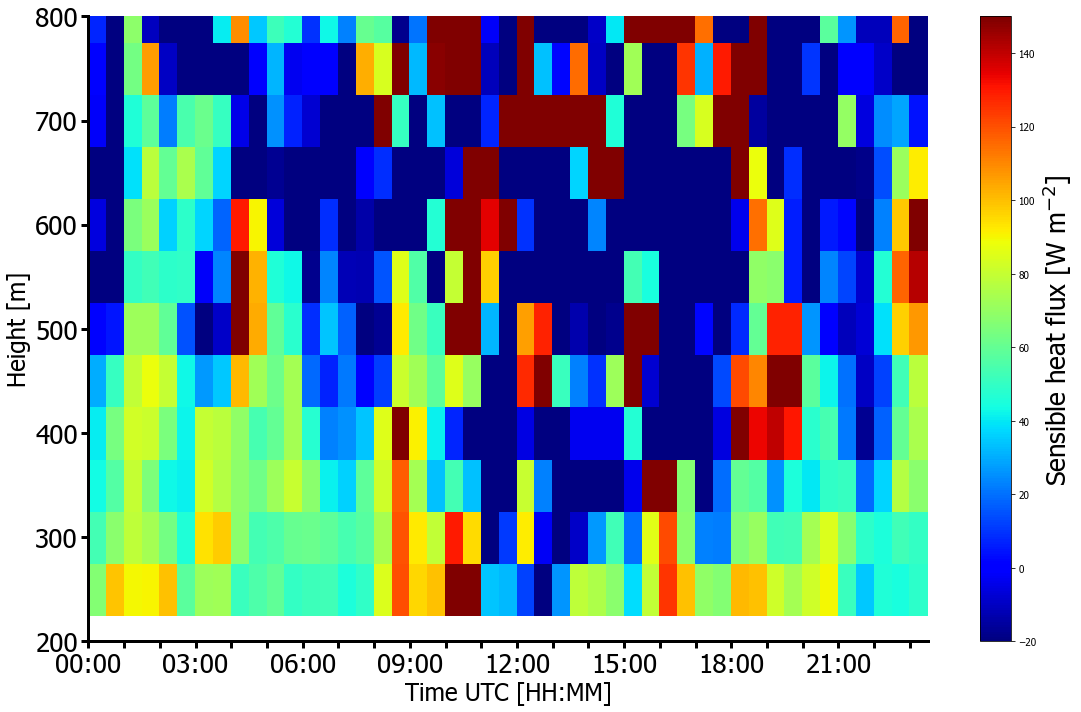

In [36]:
# reading variables for the plot and deriving the plot
SHF = grouped_mean.Product.values
time = grouped_mean.Time.values
height = grouped_mean.Height.values
var_name ='SHF'

labelsizeaxes   = 26
fontSizeTitle   = 26
fontSizeX       = 26
fontSizeY       = 26
cbarAspect      = 26
fontSizeCbar    = 26
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as ticker


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,10))
rcParams['font.sans-serif'] = ['Tahoma']
matplotlib.rcParams['savefig.dpi'] = 100
plt.gcf().subplots_adjust(bottom=0.15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=1))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=3))
ax.tick_params(which='minor', length=7, width=3)
ax.tick_params(which='major', length=7, width=3)

#ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.tick_params(axis='both', labelsize=26)

mesh1 = ax.pcolormesh(pd.to_datetime(time), height, LHF.T, cmap='jet', vmin=-20., vmax=150., rasterized=True)
ax.set_xlabel('Time UTC [HH:MM]', fontsize=24)
ax.set_ylabel('Height [m]', fontsize=24)
ax.set_ylim(200., 800.)
cbar = fig.colorbar(mesh1, use_gridspec=True)
#cbar.set_label(label='Water vapor mixing ratio [g kg$^{-1}$]',  size=26)
cbar.set_label(label='Sensible heat flux [W m$^{-2}$]',  size=26)

fig.tight_layout()
fig.savefig(path_out+var_name+'_diurnal_cycle.png')

<ipython-input-4-90f851dc2fc3>:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh1 = ax.pcolormesh(pd.to_datetime(time), height, T.T, cmap='jet', vmin=290., vmax=310., rasterized=True)


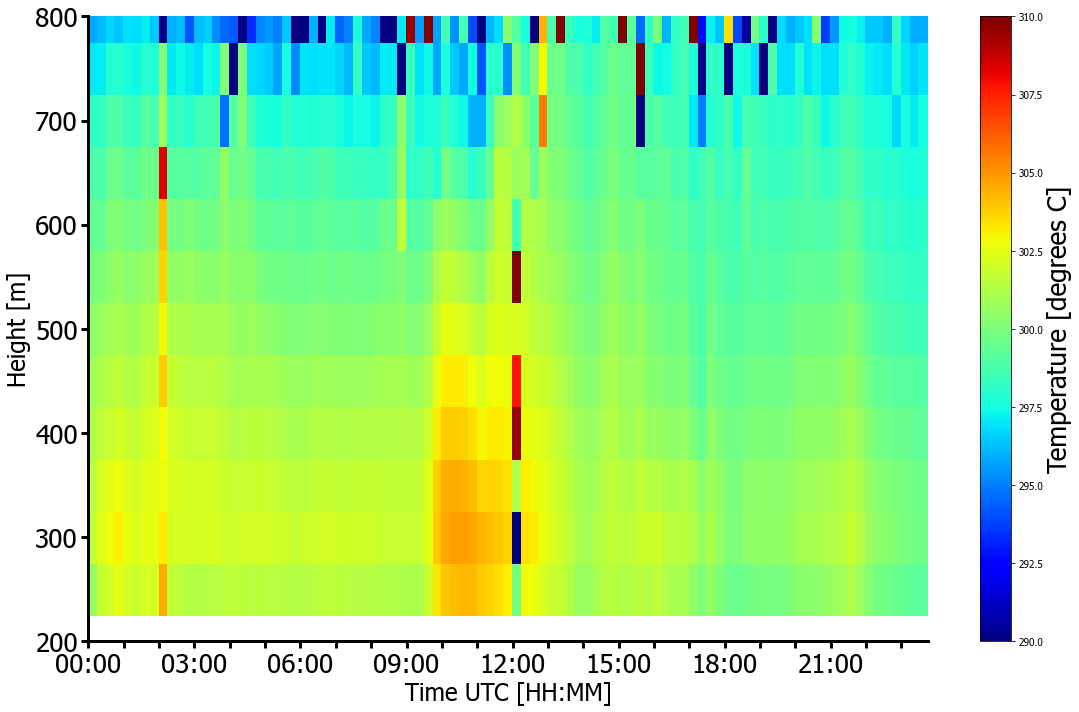

In [4]:
# reading variables for the plot and deriving the plot
T = grouped_mean.Product.values
time = grouped_mean.Time.values
height = grouped_mean.Height.values


labelsizeaxes   = 26
fontSizeTitle   = 26
fontSizeX       = 26
fontSizeY       = 26
cbarAspect      = 26
fontSizeCbar    = 26
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as ticker


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,10))
rcParams['font.sans-serif'] = ['Tahoma']
matplotlib.rcParams['savefig.dpi'] = 100
plt.gcf().subplots_adjust(bottom=0.15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=1))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=3))
ax.tick_params(which='minor', length=7, width=3)
ax.tick_params(which='major', length=7, width=3)

#ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.tick_params(axis='both', labelsize=26)

mesh1 = ax.pcolormesh(pd.to_datetime(time), height, T.T, cmap='jet', vmin=290., vmax=310., rasterized=True)
ax.set_xlabel('Time UTC [HH:MM]', fontsize=24)
ax.set_ylabel('Height [m]', fontsize=24)
ax.set_ylim(200., 800.)
cbar = fig.colorbar(mesh1, use_gridspec=True)
cbar.set_label(label='Temperature [degrees C]',  size=26)

fig.tight_layout()
fig.savefig(path_out+'T_diurnal_cycle.png')


<ipython-input-41-54a0cdcfe7d0>:31: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh1 = ax.pcolormesh(pd.to_datetime(time), height, T.T, cmap='jet', vmin=290., vmax=310., rasterized=True)


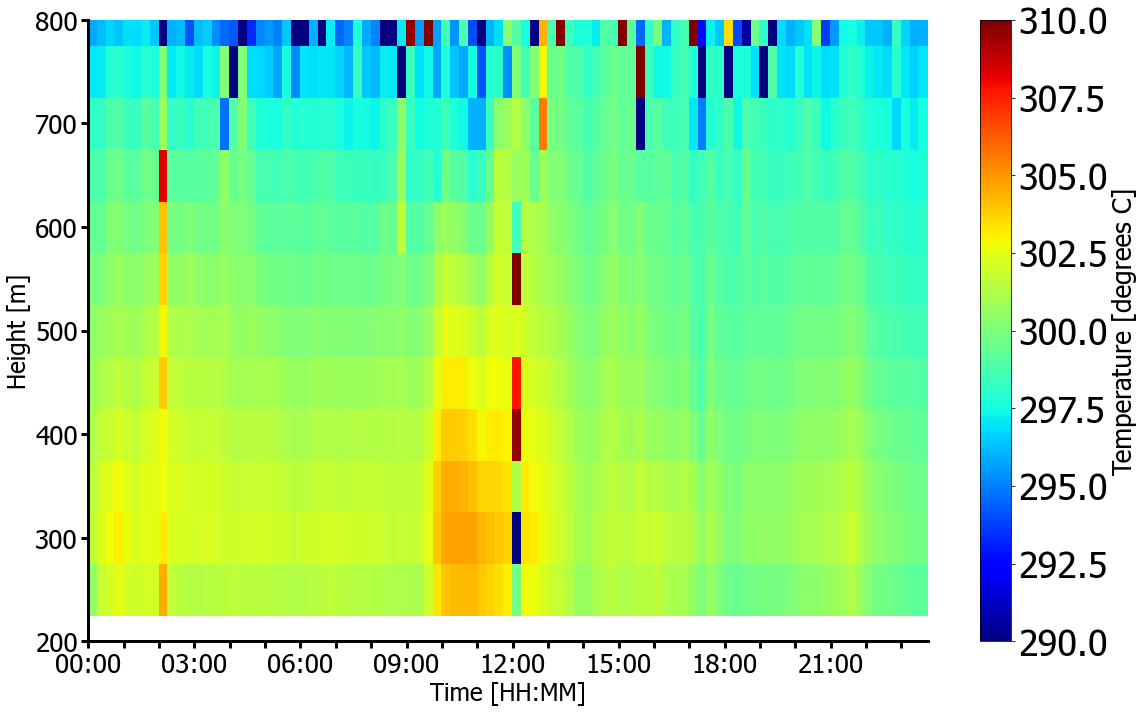